# **Практическая работа №9. Ансамблевые методы в машинном обучении**

## **Задание №1: Классификация лиц из набора данных Olivetti Faces с помощью алгоритмов градиентного бустинга**

В этом задании мы применим несколько популярных алгоритмов градиентного бустинга - CatBoost, LightGBM, XGBoost и GradientBoosting из библиотеки scikit-learn для решения задачи классификации лиц из набора данных Olivetti Faces. Цель - определить, какому человеку принадлежит новое изображение лица, на основе обучения на размеченных данных.





Шаги выполнения задания:

1. Загрузите набор данных Olivetti Faces с помощью функции `fetch_olivetti_faces()` из scikit-learn.

2. Разделите данные на обучающую и тестовую выборки с помощью `train_test_split()`.

3. Выполните предобработку изображений:
   - Преобразуйте изображения в вектора признаков (flatten)
   - Нормализуйте значения пикселей (разделите на 255)

4. Создайте и обучите модели градиентного бустинга:
   - CatBoostClassifier
   - LGBMClassifier
   - XGBClassifier
   - GradientBoostingClassifier

5. Оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

6. Сравните точность и время обучения разных алгоритмов. Определите, какой из них лучше подходит для данной задачи.

7. Сделайте выводы о сравнительной эффективности разных алгоритмов градиентного бустинга для классификации лиц.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

In [1]:
!pip install catboost lightgbm

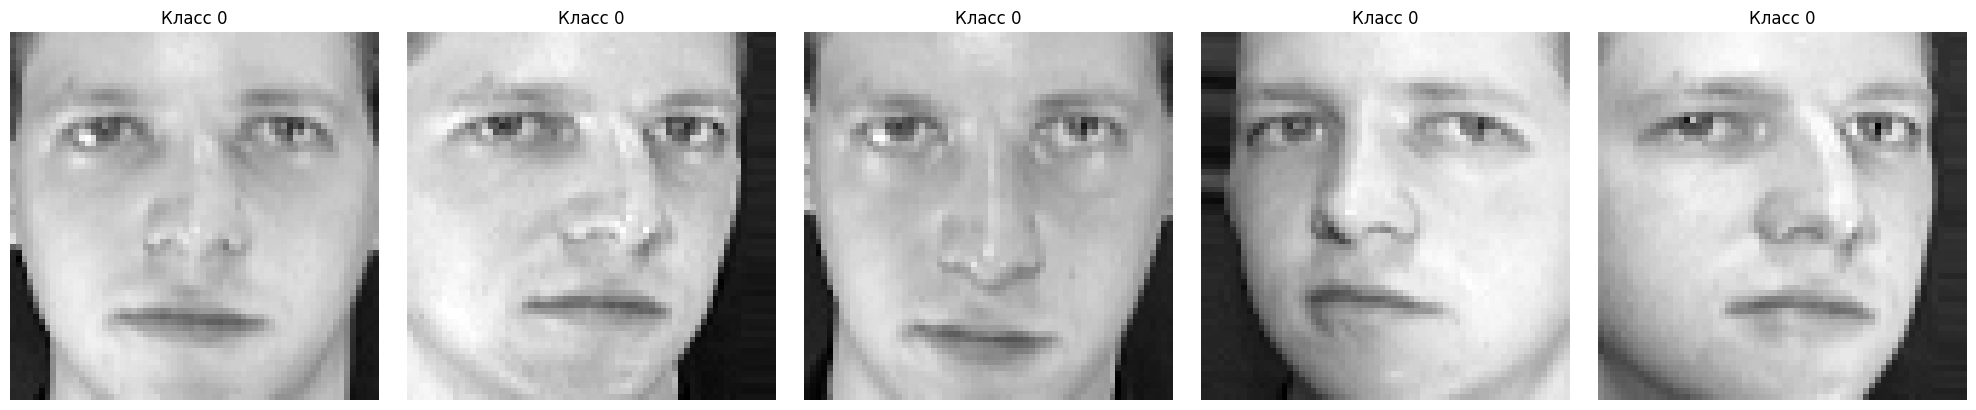

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# 1. Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [3]:
# 2. Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X = faces.images
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
# 3. Выполните предобработку изображений
# Преобразование изображений в вектора признаков (flatten)

# Нормализация значений пикселей
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

X_train_flat.shape

(320, 4096)

In [5]:
# 4. Создайте и обучите модели градиентного бустинга:
# CatBoostClassifier
from catboost import CatBoostClassifier

model_1 = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0
)
model_1.fit(X_train_flat, y_train)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_1 = model_1.score(X_test_flat, y_test)
print(f"Точность на тестовой выборке: {accuracy_1:.2f}")

Точность на тестовой выборке: 0.86


In [9]:
import lightgbm as lgb

# Создание объектов Dataset
train_data = lgb.Dataset(X_train_flat, label=y_train)
valid_data = lgb.Dataset(X_test_flat, label=y_test, reference=train_data)

# Параметры модели
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'learning_rate': 0.1,
    'num_leaves': 31
}

# Обучение модели с early stopping через коллбэк
lgbm_model = lgb.train(
    params,
    train_data,
    num_boost_round=100,  # Количество итераций (аналог n_estimators)
    valid_sets=[valid_data],  # Валидационная выборка
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]  # Ранняя остановка
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 305199
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 4096
[LightGBM] [Info] Start training from score -3.822411
[LightGBM] [Info] Start training from score -3.822411
[LightGBM] [Info] Start training from score -3.571096
[LightGBM] [Info] Start training from score -3.465736
[LightGBM] [Info] Start training from score -3.571096
[LightGBM] [Info] Start training from score -3.571096
[LightGBM] [Info] Start training from score -3.822411
[LightGBM] [Info] Start training from score -3.571096
[LightGBM] [Info] Start training from score -3.822411
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.822411
[LightGBM] [Info] Start training from score -3.571096
[LightGBM] [Info] Start training from score -3.688879
[LightG

In [10]:
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
import lightgbm as lgb

# Создание объектов Dataset
train_data = lgb.Dataset(X_train_flat, label=y_train)
valid_data = lgb.Dataset(X_test_flat, label=y_test, reference=train_data)

# Параметры модели
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'learning_rate': 0.1,
    'num_leaves': 31
}

# Обучение модели с early stopping через коллбэк
lgbm_model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[valid_data],
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 305199
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 4096
[LightGBM] [Info] Start training from score -3.822411
[LightGBM] [Info] Start training from score -3.822411
[LightGBM] [Info] Start training from score -3.571096
[LightGBM] [Info] Start training from score -3.465736
[LightGBM] [Info] Start training from score -3.571096
[LightGBM] [Info] Start training from score -3.571096
[LightGBM] [Info] Start training from score -3.822411
[LightGBM] [Info] Start training from score -3.571096
[LightGBM] [Info] Start training from score -3.822411
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.822411
[LightGBM] [Info] Start training from score -3.571096
[LightGBM] [Info] Start training from score -3.688879
[LightG

In [13]:
# Создание DMatrix — оптимизированного объекта данных для XGBoost
dtrain = xgb.DMatrix(X_train_flat, label=y_train)
dtest = xgb.DMatrix(X_test_flat, label=y_test)
# Параметры модели
params = {
    'objective': 'multi:softmax',    # Задача многоклассовой классификации
    'eval_metric': 'mlogloss',        # Функция потерь
    'eta': 0.1,                      # Коэффициент обучения
    'max_depth': 3,                   # Максимальная глубина дерева
    'num_class': len(np.unique(y_train))  # Количество классов
}
# Обучение модели
num_rounds = 100
xgb = xgb.train(params, dtrain, num_rounds)

In [14]:
y_pred_xgb = xgb.predict(dtest)
y_pred = (y_pred_xgb > 0.5).astype(int)

# Оценка точности
accuracy_xgb = accuracy_score(y_test, y_pred)
print(f"Точность модели XGBoost: {accuracy_xgb:.4f}")

Точность модели XGBoost: 0.0625


In [15]:
# Создание и обучение модели
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1,
                                 max_depth=3, random_state=1)
gbc.fit(X_train_flat, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [17]:
from sklearn.metrics import accuracy_score

In [16]:
# Предсказание на тестовых данных
y_pred_gbc = gbc.predict(X_test_flat)

# Оценка точности
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f"Точность модели: {accuracy_gbc:.4f}")

Точность модели: 0.6375


## **Задание №2: Предсказание нижней половины лица по верхней с помощью алгоритмов градиентного бустинга**




- В этом задании мы применим алгоритмы градиентного бустинга - CatBoost, LightGBM, XGBoost и GradientBoostingRegressor - для решения интересной задачи регрессии на датасете лиц Olivetti Faces. Цель - предсказать значения пикселей нижней половины лица по пикселям верхней половины.

- Каждое изображение лица представляет собой матрицу 64x64 в оттенках серого. Мы разделим изображения на верхнюю и нижнюю половины и будем предсказывать значения яркости пикселей нижней половины по значениям верхней.

- Сравним качество (по метрике R^2) и время обучения разных реализаций градиентного бустинга на этой задаче восстановления изображений. Посмотрим, насколько хорошо алгоритмы бустинга смогут достроить нижнюю часть лица по верхней.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

In [18]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

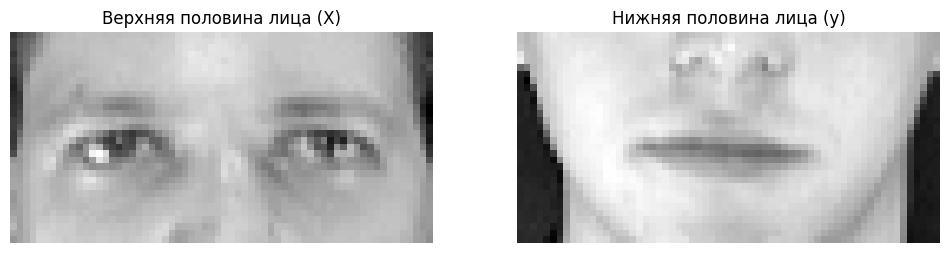

In [19]:
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
n_samples = images.shape[0]

# Разделение изображений на верхнюю и нижнюю половины
upper_half = images[:, :32, :]  # Верхняя половина (первые 32 строки)
lower_half = images[:, 32:, :]  # Нижняя половина (последние 32 строки)

# Преобразование 2D изображений в 1D векторы
X = upper_half.reshape((n_samples, -1))
y = lower_half.reshape((n_samples, -1))

# Выбор одного примера для отображения
sample_index = 0  # Измените значение для выбора другого изображения

# Восстановление изображений из векторов
upper_face = X[sample_index].reshape(32, 64)
lower_face = y[sample_index].reshape(32, 64)

# Отображение верхней и нижней половин лица
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(upper_face, cmap='gray')
axes[0].set_title('Верхняя половина лица (X)')
axes[0].axis('off')

axes[1].imshow(lower_face, cmap='gray')
axes[1].set_title('Нижняя половина лица (y)')
axes[1].axis('off')

plt.show()

In [20]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
# Используем подвыборку данных для ускорения
sample = 0.3
sample_size = int(len(X_train) * sample)
sample_random = np.random.choice(len(X_train), size=sample_size, replace=False)
X_train_sample = X_train[sample_random]
y_train_sample = y_train[sample_random]

In [22]:
# CatBoostRegressor
# Словарь для хранения результатов
results = {}
start_time = time.time()
# Создание и обучение модели
model_cbr = MultiOutputRegressor(CatBoostRegressor(iterations=30, #Максимальное количество деревьев
                                                  learning_rate=0.1, #Темп обучения (также известен как скорость сходимости)
                                                  depth=3, #Глубина дерева
                                                  thread_count=-1,
                                                  verbose=0))
model_cbr.fit(X_train_sample, y_train_sample)
training_time_cbr = time.time() - start_time

y_pred_cbr = model_cbr.predict(X_test)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html и https://habr.com/ru/articles/558084/
r2_cbr = r2_score(y_test, y_pred_cbr)

results['CatBoostRegressor'] = {'R^2': r2_cbr, 'training_time': training_time_cbr}

In [23]:
results['CatBoostRegressor'] = {'R^2': r2_cbr, 'training_time': training_time_cbr}

In [24]:
print("R^2:", r2_cbr)
print("Training time:", training_time_cbr)

R^2: 0.3404868823947843
Training time: 1836.4886932373047


In [25]:
# LightGBM
from lightgbm import LGBMRegressor
start_time = time.time()
model_lgbm = MultiOutputRegressor(LGBMRegressor(n_estimators=50,
                                                #max_depth=5,
                                                learning_rate=0.1,
                                                num_leaves=30,
                                                verbose=-1))
model_lgbm.fit(X_train_sample, y_train_sample)
training_time_lgbm = time.time() - start_time
y_pred_lgbm = model_lgbm.predict(X_test)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
results['LightGBM'] = {'R^2': r2_lgbm, 'training_time': training_time_lgbm}

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 an

In [26]:
print("R^2:", r2_lgbm)
print("Training time:", training_time_lgbm)

R^2: 0.35925494331095925
Training time: 512.1575133800507


In [27]:
from xgboost import XGBRegressor
start_time = time.time()
model_xgb = MultiOutputRegressor(XGBRegressor(n_estimators=25,
                                              learning_rate=0.1,
                                              max_depth=3,
                                              tree_method='hist',
                                              n_jobs=-1))
model_xgb.fit(X_train_sample, y_train_sample)
train_time_xgb = time.time() - start_time
y_pred_xgb = model_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
results['XGBRegressor'] = {'R^2': r2_xgb, 'training_time': train_time_xgb}

In [28]:
print("R^2:", r2_xgb)
print("Training time:", train_time_xgb)

R^2: 0.3420409560203552
Training time: 912.4521615505219


In [29]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
start_time = time.time()
model_gdr = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=30,
                                                           learning_rate=0.1,
                                                           max_depth=5))
model_gdr.fit(X_train_sample, y_train_sample)
train_time_gdr = time.time() - start_time
y_pred_gdr  = model_gdr.predict(X_test)
r2_gdr = r2_score(y_test, y_pred_gdr)

In [30]:
results['GradientBoostingRegressor'] = {'R^2': r2_gdr, 'training_time': train_time_gdr}

In [31]:
print("R^2:", r2_gdr)
print("Training time:", train_time_gdr)

R^2: 0.24322522326673865
Training time: 3601.333498477936


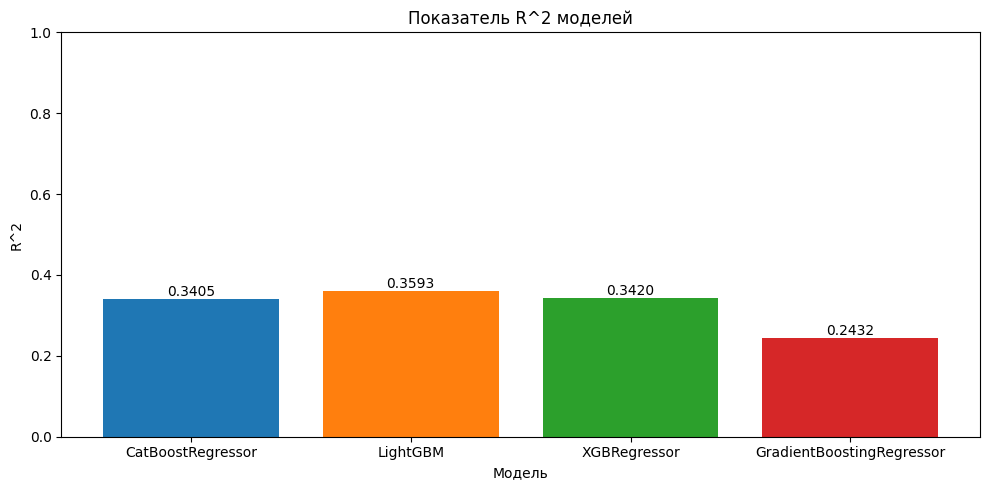

In [32]:
# Построение графиков
models = list(results.keys())
r2_scores = [results[model]['R^2'] for model in models]
training_times = [results[model]['training_time'] for model in models]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Цвета для столбиков

# Построение графика R^2
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2_scores[i]:.4f}', ha='center', va='bottom')
plt.title('Показатель R^2 моделей')
plt.xlabel('Модель')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

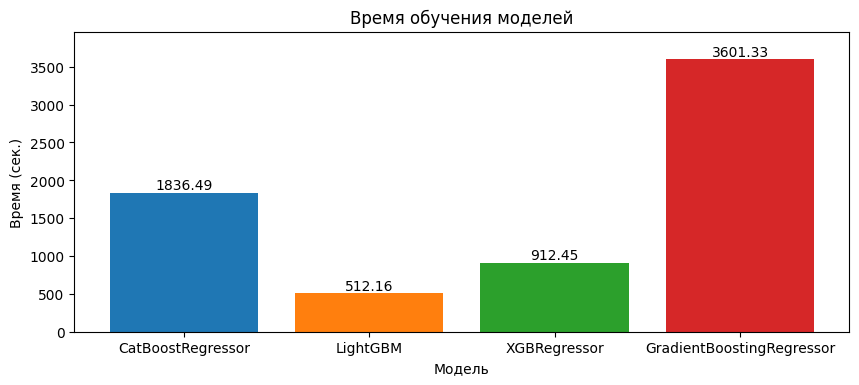

In [33]:
# Построение графика времени обучения
plt.figure(figsize=(10, 5))
bars = plt.bar(models, training_times, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{training_times[i]:.2f}',
             ha='center', va='bottom', fontsize=10)
plt.title('Время обучения моделей')
plt.xlabel('Модель')
plt.ylabel('Время (cек.)')
plt.ylim(0, max(training_times) * 1.1)  # Ограничение по y для визуализации
plt.subplots_adjust(bottom=0.2, top=0.8)  # Настройка отступов
plt.show()

## **Задание №3: Классификация лиц из набора Olivetti Faces с помощью ансамбля классификаторов VotingClassifier**



- В этом задании мы применим ансамблевый метод классификации VotingClassifier из библиотеки scikit-learn для решения задачи распознавания лиц из набора данных Olivetti Faces. VotingClassifier объединяет предсказания нескольких базовых классификаторов путем голосования, что позволяет улучшить качество классификации по сравнению с отдельными моделями

- Мы будем использовать несколько "слабых" классификаторов, таких как LogisticRegression, DecisionTreeClassifier и KNeighborsClassifier, NaiveBayes и объединим их в ансамбль с помощью VotingClassifier. Затем сравним точность ансамбля с отдельными базовыми моделями и оценим эффект от их комбинирования.



- Не забудьте предварительно обработать изображения перед подачей в модели:
  - Преобразовать изображения в вектора признаков (flatten)
  - Нормализовать значения пикселей (разделить на 255)

- После обучения, оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

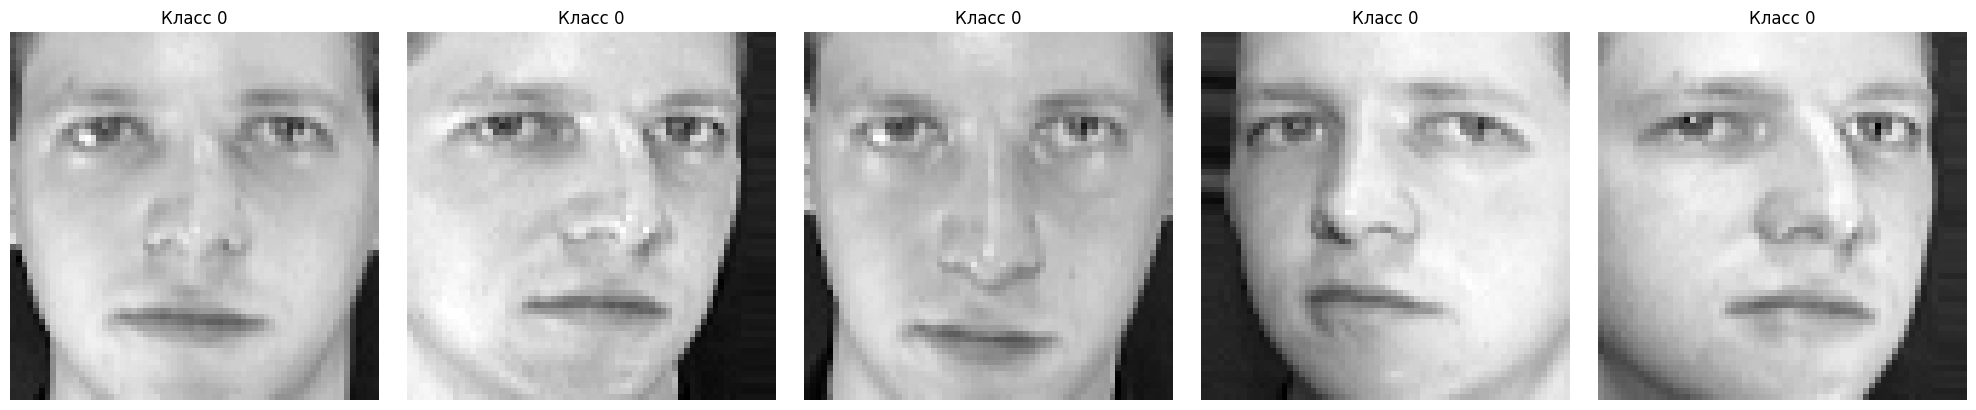

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [35]:
# 2. Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X = faces.images
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

X_train_flat.shape

(320, 4096)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Бэггинговые ансамблевые модели
from sklearn.ensemble import VotingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [38]:
# Стандартизация признаков для моделей, чувствительных к масштабу
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [39]:
# Определение базовых моделей
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
nb = GaussianNB()

In [40]:
# Определение бэггинговых ансамблевых моделей
# Ансамбль с мягким голосованием (VotingClassifier)
voting = VotingClassifier(
    estimators=[('log_reg', log_reg), ('dt', dt), ('knn', knn), ('nb', nb)],
    voting='soft'  # Используем вероятности классов
)

# Словарь всех моделей
models = {
    'Логистическая регрессия': log_reg,
    'Дерево решений': dt,
    'KNN': knn,
    'Наивный Байес': nb,
    'Ансамбль (Voting)': voting
}

In [41]:
# Обучение моделей
for name, model in models.items():
    print(f"Обучение модели {name}...")
    if name == 'Ансамбль (Voting)':
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train_flat, y_train)

Обучение модели Логистическая регрессия...
Обучение модели Дерево решений...
Обучение модели KNN...
Обучение модели Наивный Байес...
Обучение модели Ансамбль (Voting)...


In [42]:
# Предсказание и оценка моделей
# Оценка точности моделей
accuracies = {}
for name, model in models.items():
    if name == 'Логистическая регрессия':
      y_pred_log_reg = log_reg.predict(X_test_scaled)
      accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
      accuracies[name] = accuracy_log_reg
    elif name == 'Ансамбль (Voting)':  # Для ансамбля с голосованием
      y_pred = model.predict(X_test_scaled)
      accuracy = accuracy_score(y_test, y_pred)
      accuracies[name] = accuracy
    else:
      y_pred = model.predict(X_test_flat)
      accuracy = accuracy_score(y_test, y_pred)
      accuracies[name] = accuracy

# Вывод результатов
print("\nТочность моделей:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")


Точность моделей:
Логистическая регрессия: 0.4500
Дерево решений: 0.5375
KNN: 0.8125
Наивный Байес: 0.8625
Ансамбль (Voting): 0.9250


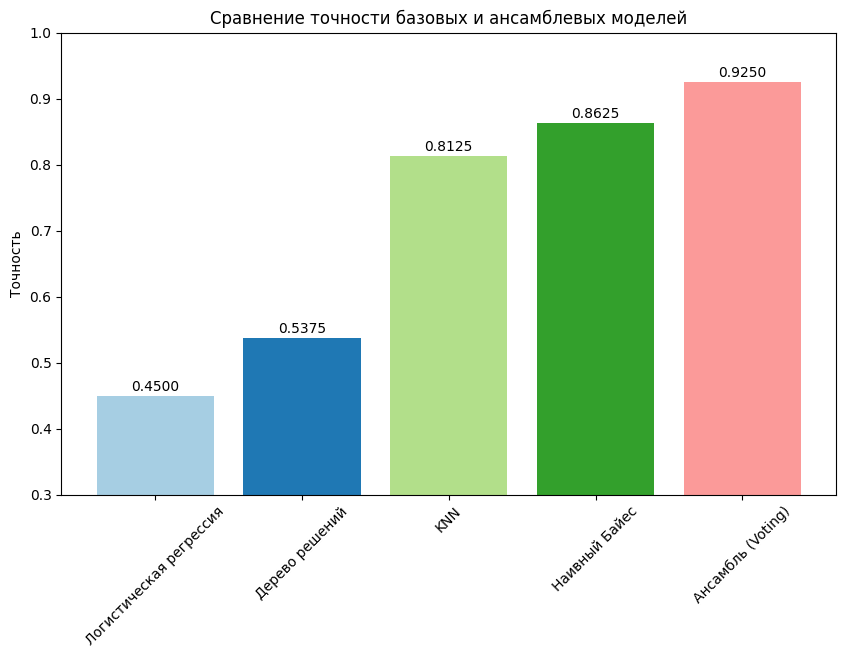

In [43]:
# Визуализация производительности моделей
# Построение столбчатой диаграммы точности моделей
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=plt.cm.Paired(range(len(accuracies))))
plt.title('Сравнение точности базовых и ансамблевых моделей')
plt.ylabel('Точность')
plt.ylim([0.3, 1.0])

# Отображение значений точности над столбцами
for bar, accuracy in zip(bars, accuracies.values()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.003, f'{accuracy:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Ансамбль (Voting)')

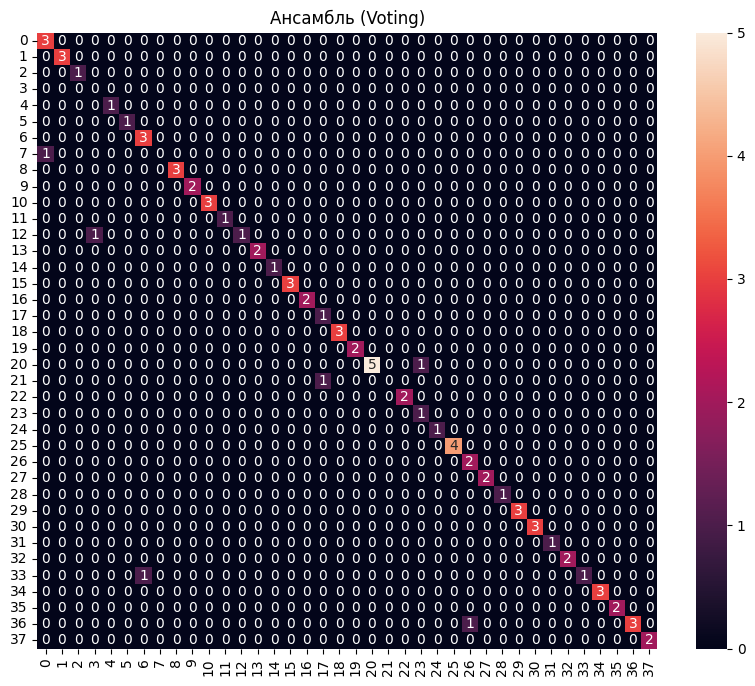

In [45]:
y_pred = model.predict(X_test_scaled)
conf_mat_voting=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_voting,annot=True,fmt='d')
plt.title('Ансамбль (Voting)')

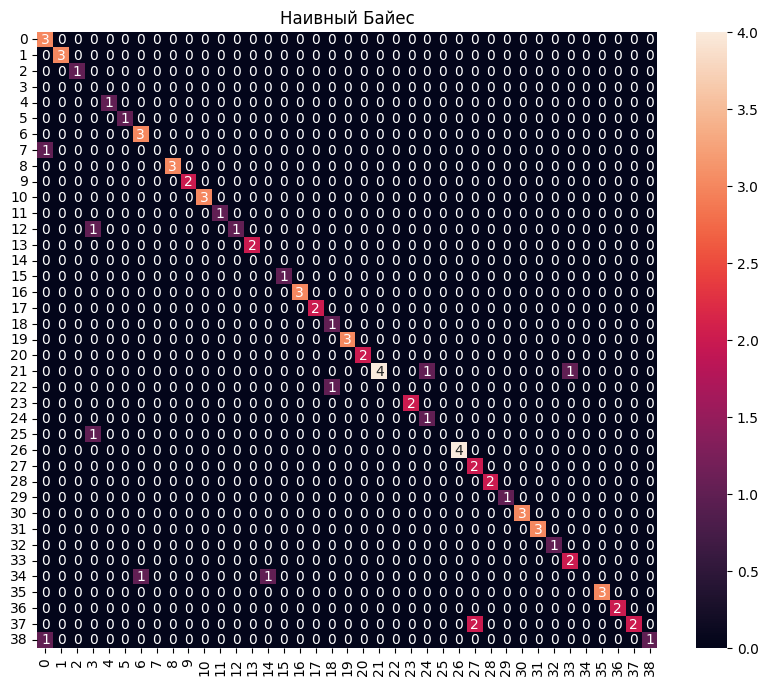

In [46]:
for name, model in models.items():
    if name == 'Наивный Байес':
        # Предсказание для тестовых данных
        y_pred_nb = model.predict(X_test_flat)  # Используем плоские данные для дерева решений
        # Вычисляем матрицу ошибок
        conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_mat_nb, annot=True, fmt='d')
        plt.title('Наивный Байес')
        plt.show()

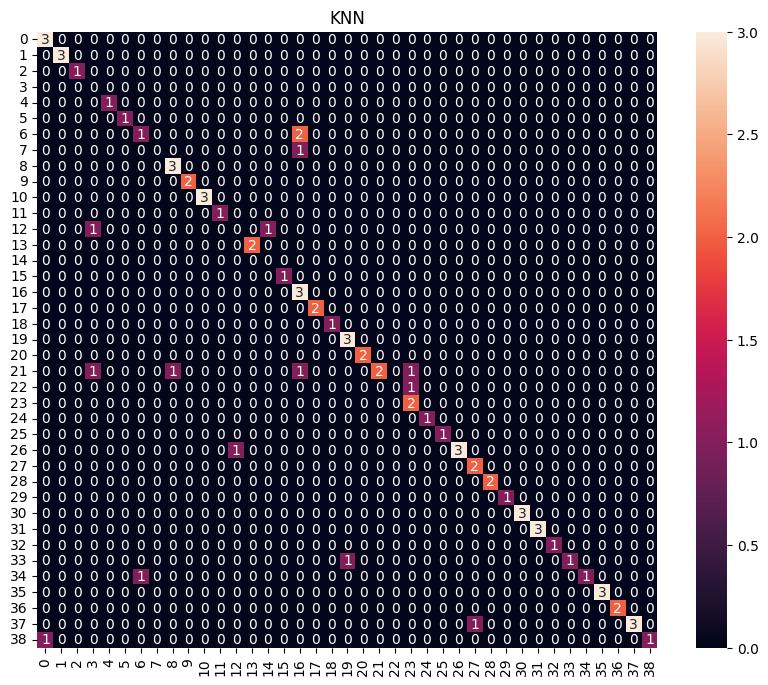

In [47]:
for name, model in models.items():
    if name == 'KNN':
        # Предсказание для тестовых данных
        y_pred_knn = model.predict(X_test_flat)  # Используем плоские данные для дерева решений
        # Вычисляем матрицу ошибок
        conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_mat_knn, annot=True, fmt='d')
        plt.title('KNN')
        plt.show()

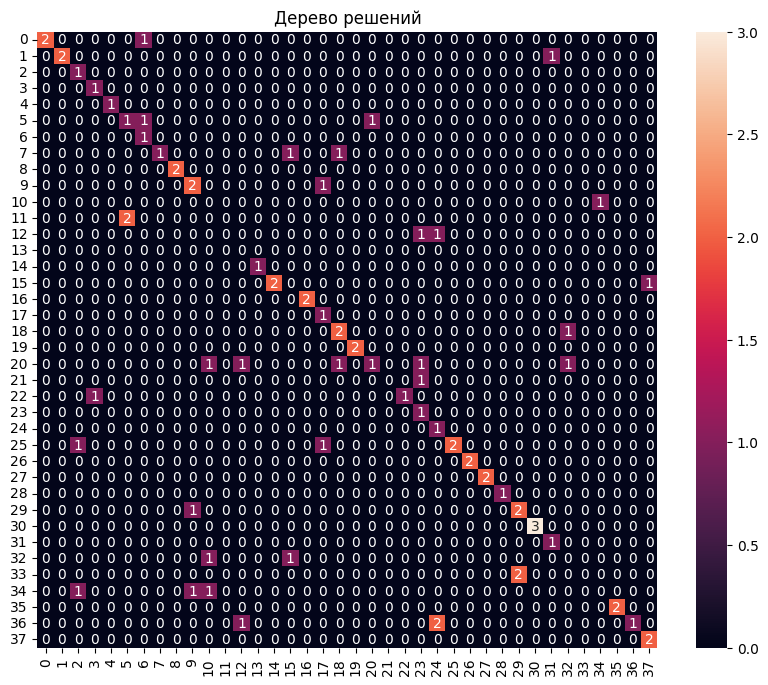

In [48]:
for name, model in models.items():
    if name == 'Дерево решений':
        # Предсказание для тестовых данных
        y_pred_dt = model.predict(X_test_flat)  # Используем плоские данные для дерева решений
        # Вычисляем матрицу ошибок
        conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_mat_dt, annot=True, fmt='d')
        plt.title('Дерево решений')
        plt.show()

Text(0.5, 1.0, 'Логистическая регрессия')

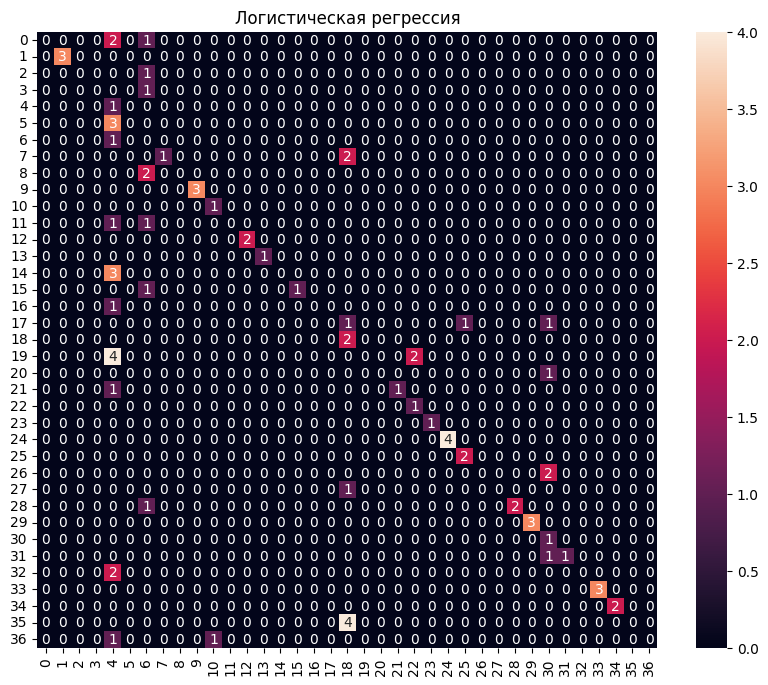

In [49]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
conf_mat_log_reg=confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_log_reg,annot=True,fmt='d')
plt.title('Логистическая регрессия')

## **Задание №4: Классификация лиц из набора Olivetti Faces с помощью ансамбля классификаторов** [**StackingClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)



- В этом задании мы применим ансамблевый метод классификации StackingClassifier из библиотеки scikit-learn для решения задачи распознавания лиц из набора данных Olivetti Faces. StackingClassifier объединяет предсказания нескольких базовых классификаторов путем обучения метаклассификатора на их выходах, что позволяет улучшить качество классификации по сравнению с отдельными моделями и методом голосования VotingClassifier.


- Мы будем использовать несколько "слабых" классификаторов первого уровня, таких как LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier и GaussianNB. Затем мы обучим метаклассификатор второго уровня (например, LogisticRegression или SVC) на выходах классификаторов первого уровня. Метаклассификатор будет учиться комбинировать предсказания базовых моделей оптимальным образом.




- Не забудьте предварительно обработать изображения перед подачей в модели:
  - Преобразовать изображения в вектора признаков (flatten)
  - Нормализовать значения пикселей (разделить на 255)

- После обучения, оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

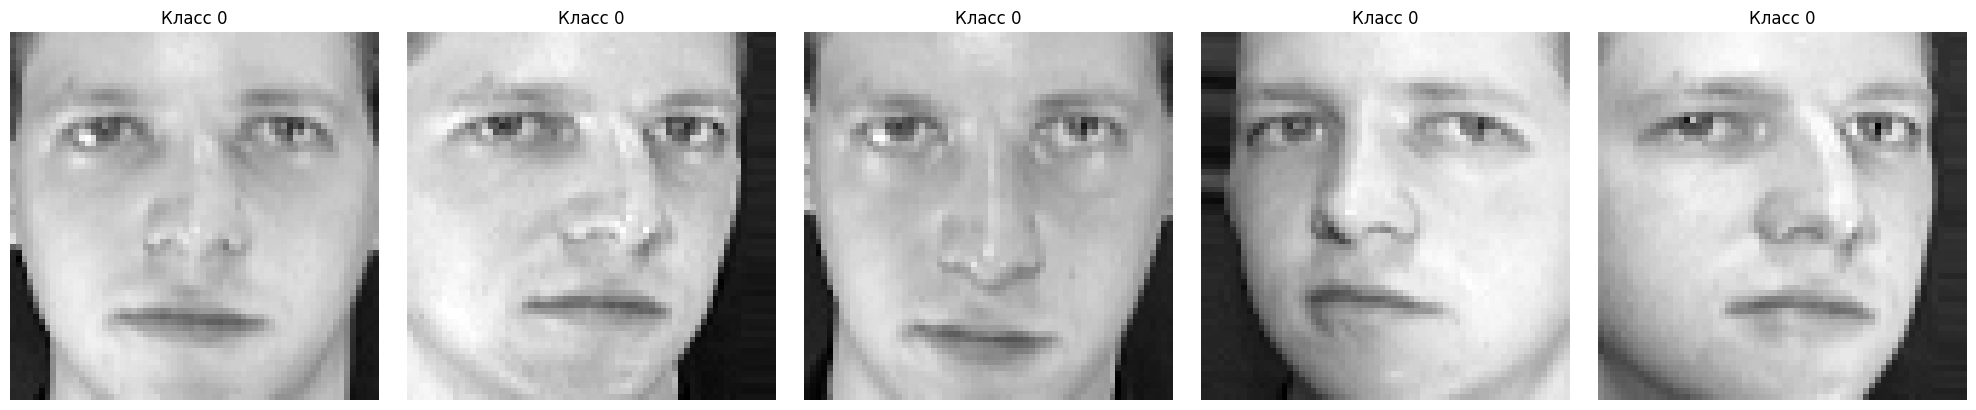

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [51]:
# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X = faces.images
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

X_train_flat.shape

(320, 4096)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

In [53]:
# Стандартизация признаков для моделей, чувствительных к масштабу
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [54]:
# Определение базовых моделей и мета-модели
base_models = [
    ('log_reg', LogisticRegression()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('gnb', GaussianNB())
]

# Мета-модель
meta_model = LogisticRegression()

# Создание регрессора стекинга
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    #cv=KFold(n_splits=5, shuffle=True, random_state=42)
)

In [55]:
# Обучение классификатора стекинга
stacking_classifier.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


StackingClassifier(estimators=[('log_reg', LogisticRegression()),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [56]:
# Предсказания регрессора стекинга на тестовых данных и оценка точности
stacking_pred = stacking_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, stacking_pred)
print(f"Точность StackingClassifier: {accuracy:.4f}")

Точность StackingClassifier: 0.9125


In [57]:
# Оценка базовых моделей
for name, model in base_models:
    # Обучение
    model.fit(X_train_scaled, y_train)
    # Предсказания на тестовых данных
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Точность ({name}): {accuracy:.4f}")

Точность (log_reg): 0.9500
Точность (dt): 0.5250
Точность (knn): 0.7875
Точность (gnb): 0.8625


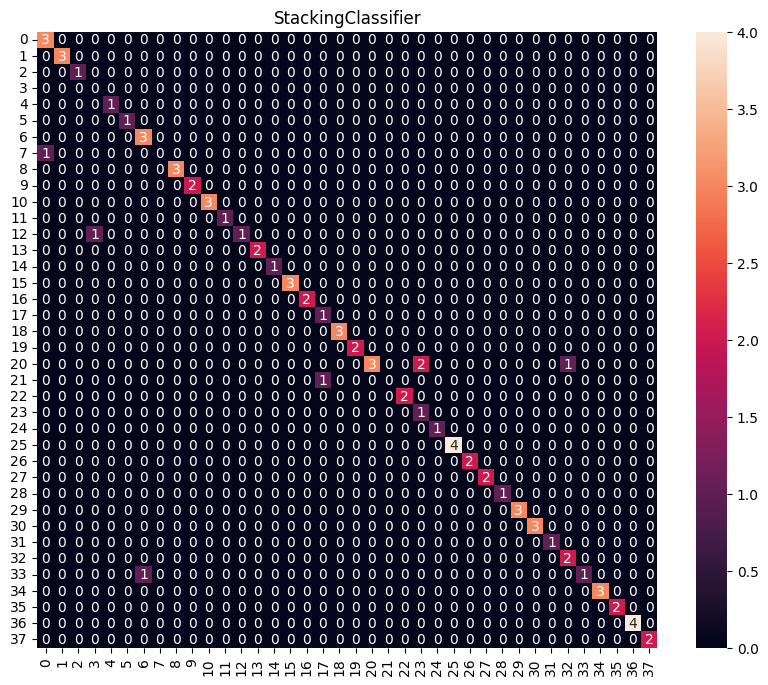

In [58]:
conf_mat=confusion_matrix(y_test, stacking_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.title('StackingClassifier')
plt.show()

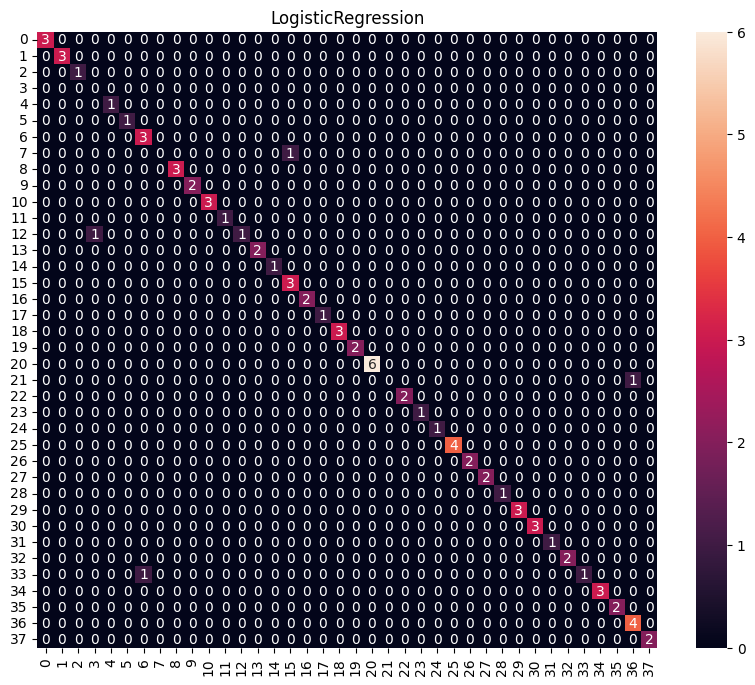

In [59]:
# Построение матрицы ошибок
for name, model in base_models:
    if name == 'log_reg':
        model.fit(X_train_scaled, y_train)
        y_pred_log_reg = model.predict(X_test_scaled)
        conf_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg)
        plt.figure(figsize=(10,8))
        sns.heatmap(conf_mat_log_reg,annot=True,fmt='d')
        plt.title('LogisticRegression')
        plt.show()

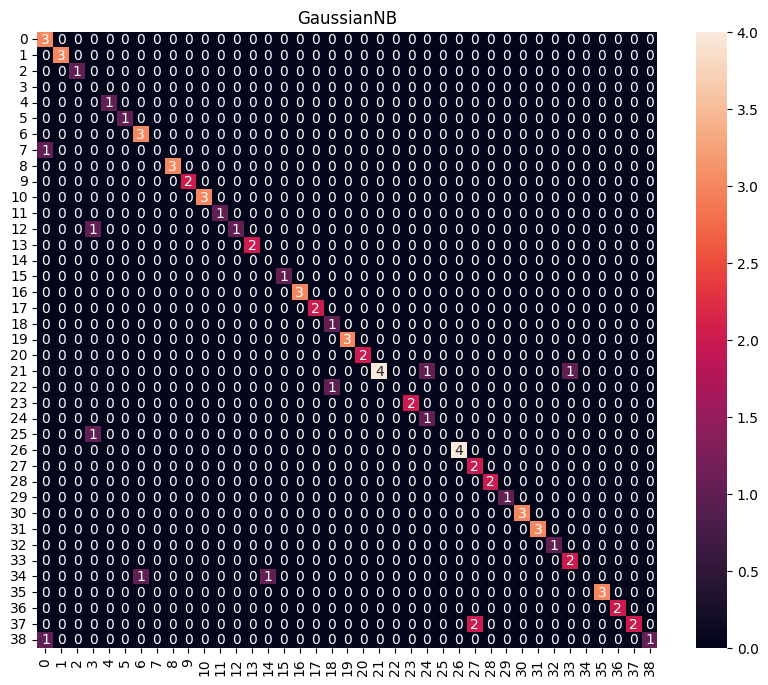

In [60]:
for name, model in base_models:
    if name == 'gnb':
        model.fit(X_train_scaled, y_train)
        y_pred_gnb = model.predict(X_test_scaled)
        conf_mat_gnb = confusion_matrix(y_test, y_pred_gnb)
        plt.figure(figsize=(10,8))
        sns.heatmap(conf_mat_gnb,annot=True,fmt='d')
        plt.title('GaussianNB')
        plt.show()

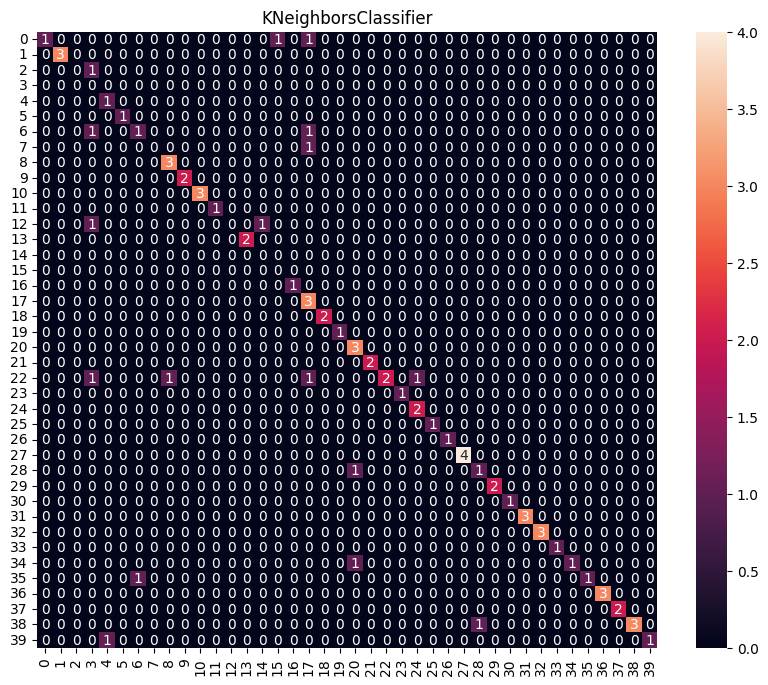

In [61]:
for name, model in base_models:
    if name == 'knn':
        model.fit(X_train_scaled, y_train)
        y_pred_knn = model.predict(X_test_scaled)
        conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
        plt.figure(figsize=(10,8))
        sns.heatmap(conf_mat_knn,annot=True,fmt='d')
        plt.title('KNeighborsClassifier')
        plt.show()

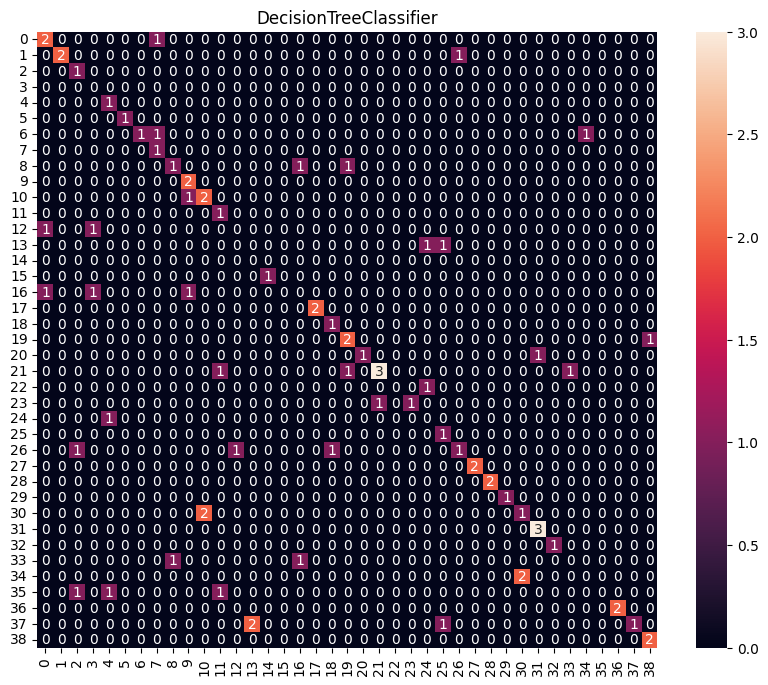

In [62]:
for name, model in base_models:
    if name == 'dt':
        model.fit(X_train_scaled, y_train)
        y_pred_dt = model.predict(X_test_scaled)
        conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
        plt.figure(figsize=(10,8))
        sns.heatmap(conf_mat_dt,annot=True,fmt='d')
        plt.title('DecisionTreeClassifier')
        plt.show()